Imports


In [15]:
import matplotlib.pyplot as plt
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
# ML
import tensorflow as tf


Loading data


In [16]:
# load dataset
mnist = tf.keras.datasets.mnist
# data already comes splitted into training and testing
# x is the input and y is the classification
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# normalize the input from 0-255 to 0-1
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)


Creating model


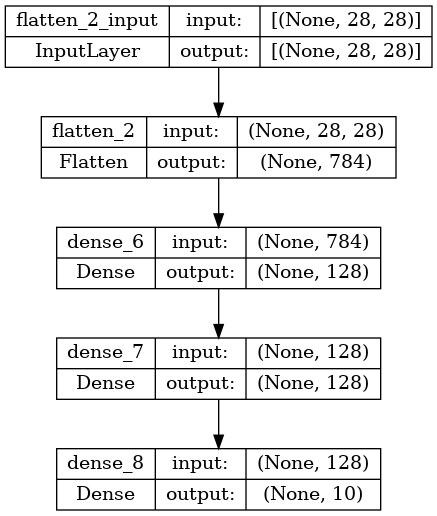

In [17]:
model = tf.keras.models.Sequential()
# Flattens the input (creates a flat layer)
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
# Creating two Dense layers with relu activation
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
# Output layer
# We use softmax as the activation to represent the confidence (0-1)
model.add(tf.keras.layers.Dense(10, activation='softmax'))
tf.keras.utils.plot_model(model, 'default.png', show_shapes=True)

Training the model

In [18]:
# We compile the model using
# The stochastic gradient descent optimization algorithm Adam
# Sparse categorical crossentropy as our loss function

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=10)
model.save('default.model')

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2647 - accuracy: 0.9239
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1087 - accuracy: 0.9669
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0733 - accuracy: 0.9774
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0523 - accuracy: 0.9833
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0393 - accuracy: 0.9874
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0315 - accuracy: 0.9893
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0247 - accuracy: 0.9920
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0206 - accuracy: 0.9932
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0166 - accuracy: 0.9940
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.015

INFO:tensorflow:Assets written to: default.model/assets


INFO:tensorflow:Assets written to: default.model/assets


Evaluate model

313/313 [==============================] - 1s 2ms/step - loss: 0.1094 - accuracy: 0.9768
{'loss': [0.26473531126976013, 0.10866210609674454, 0.07330428063869476, 0.05228303372859955, 0.03933610022068024, 0.031514499336481094, 0.0246844794601202, 0.020585037767887115, 0.016635369509458542, 0.015435767360031605], 'accuracy': [0.9239333271980286, 0.9669333100318909, 0.9774333238601685, 0.9832833409309387, 0.9874333143234253, 0.989300012588501, 0.9920499920845032, 0.993233323097229, 0.9940166473388672, 0.994616687297821]}


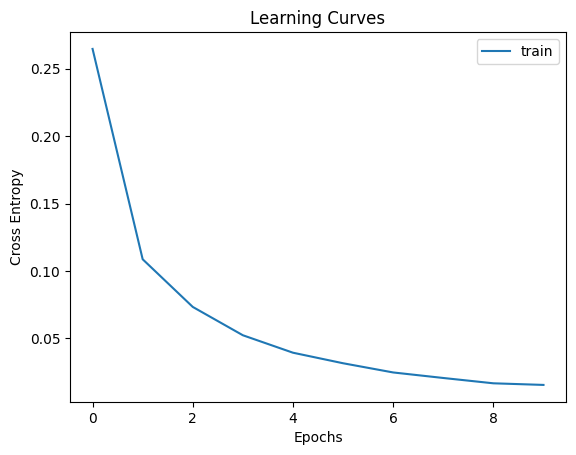

In [19]:
model = tf.keras.models.load_model('default.model')
loss, accuracy = model.evaluate(x_test,y_test)
print(history.history)
# ploting the learning curves
plt.title('Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy')
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()

Changing activation function

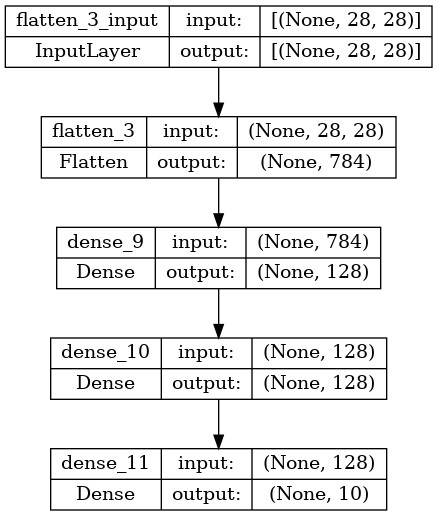

In [20]:
model = tf.keras.models.Sequential()
# Flattens the input (creates a flat layer)
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
# Creating two Dense layers with sigmoid activation
model.add(tf.keras.layers.Dense(128, activation='sigmoid'))
model.add(tf.keras.layers.Dense(128, activation='sigmoid'))
# Output layer
# We use softmax as the activation to represent the confidence (0-1)
model.add(tf.keras.layers.Dense(10, activation='softmax'))
tf.keras.utils.plot_model(model, 'sigmoid.png', show_shapes=True)

In [21]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=10)
model.save('sigmoid.model')

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5246 - accuracy: 0.8553
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2226 - accuracy: 0.9343
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1650 - accuracy: 0.9503
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1282 - accuracy: 0.9618
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1022 - accuracy: 0.9688
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0842 - accuracy: 0.9748
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0692 - accuracy: 0.9790
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0592 - accuracy: 0.9821
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0501 - accuracy: 0.9847
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.042

INFO:tensorflow:Assets written to: sigmoid.model/assets


INFO:tensorflow:Assets written to: sigmoid.model/assets


313/313 [==============================] - 1s 2ms/step - loss: 0.0842 - accuracy: 0.9748
{'loss': [0.5246425271034241, 0.22263668477535248, 0.16497400403022766, 0.1281966120004654, 0.10216377675533295, 0.08424295485019684, 0.0692187249660492, 0.05923383682966232, 0.05007154494524002, 0.04217107594013214], 'accuracy': [0.8553166389465332, 0.9343166947364807, 0.9502833485603333, 0.9618499875068665, 0.9688000082969666, 0.9748499989509583, 0.9790499806404114, 0.9821000099182129, 0.984666645526886, 0.9871833324432373]}


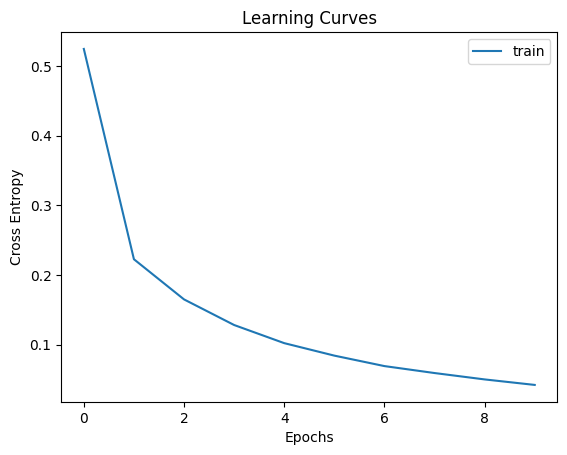

In [22]:
model = tf.keras.models.load_model('sigmoid.model')
loss, accuracy = model.evaluate(x_test,y_test)
print(history.history)
# ploting the learning curves
plt.title('Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy')
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()

Decreasing neuron count

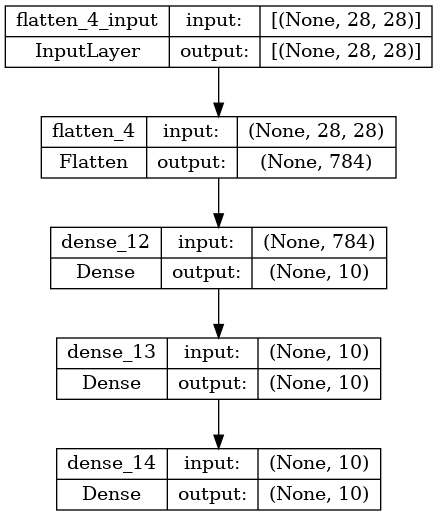

In [23]:
model = tf.keras.models.Sequential()
# Flattens the input (creates a flat layer)
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
# Creating two Dense layers with sigmoid activation
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='relu'))
# Output layer
# We use softmax as the activation to represent the confidence (0-1)
model.add(tf.keras.layers.Dense(10, activation='softmax'))
tf.keras.utils.plot_model(model, 'neuron.png', show_shapes=True)

In [24]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=10)
model.save('neuron.model')

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6405 - accuracy: 0.8082
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2921 - accuracy: 0.9173
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2532 - accuracy: 0.9280
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2342 - accuracy: 0.9329
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2220 - accuracy: 0.9361
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2128 - accuracy: 0.9379
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2062 - accuracy: 0.9396
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2005 - accuracy: 0.9416
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1962 - accuracy: 0.9428
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.191

INFO:tensorflow:Assets written to: neuron.model/assets


INFO:tensorflow:Assets written to: neuron.model/assets


313/313 [==============================] - 1s 1ms/step - loss: 0.2177 - accuracy: 0.9378
{'loss': [0.640494167804718, 0.2920745015144348, 0.25315067172050476, 0.23415179550647736, 0.2220275104045868, 0.21281535923480988, 0.20622706413269043, 0.20045685768127441, 0.19615894556045532, 0.19158083200454712], 'accuracy': [0.8082166910171509, 0.9173333048820496, 0.9279500246047974, 0.9329333305358887, 0.9361166954040527, 0.9379000067710876, 0.9396499991416931, 0.9415833353996277, 0.9428166747093201, 0.9444833397865295]}


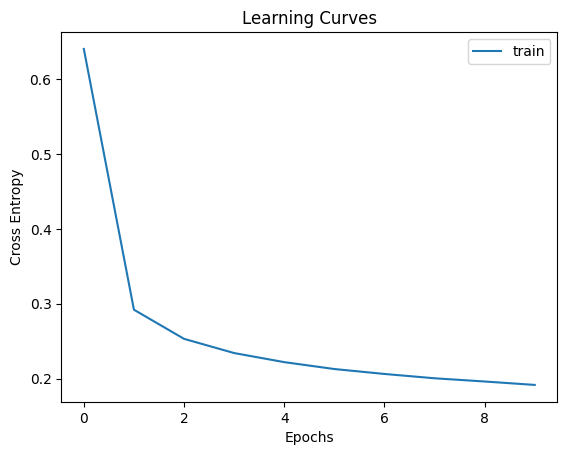

In [25]:
model = tf.keras.models.load_model('neuron.model')
loss, accuracy = model.evaluate(x_test,y_test)
print(history.history)
# ploting the learning curves
plt.title('Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy')
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()

Changing optimizer

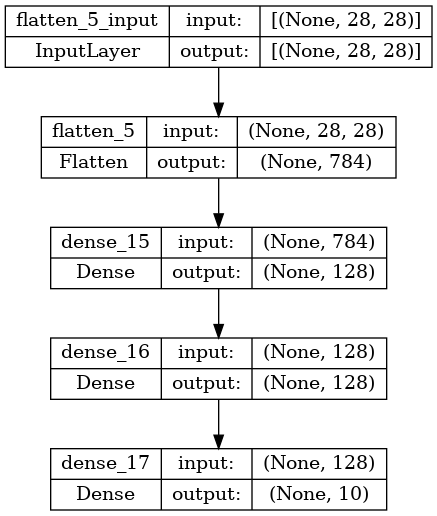

In [26]:
model = tf.keras.models.Sequential()
# Flattens the input (creates a flat layer)
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
# Creating two Dense layers with relu activation
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
# Output layer
# We use softmax as the activation to represent the confidence (0-1)
model.add(tf.keras.layers.Dense(10, activation='softmax'))
tf.keras.utils.plot_model(model, 'sgd.png', show_shapes=True)

In [27]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=10)
model.save('sgd.model')

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0767 - accuracy: 0.7415
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3893 - accuracy: 0.8899
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3196 - accuracy: 0.9080
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2841 - accuracy: 0.9190
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2592 - accuracy: 0.9261
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2390 - accuracy: 0.9323
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2224 - accuracy: 0.9365
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2075 - accuracy: 0.9408
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1944 - accuracy: 0.9445
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.182

INFO:tensorflow:Assets written to: sgd.model/assets


INFO:tensorflow:Assets written to: sgd.model/assets


313/313 [==============================] - 1s 2ms/step - loss: 0.1850 - accuracy: 0.9462
{'loss': [1.0766534805297852, 0.3892892003059387, 0.3196168839931488, 0.2840573191642761, 0.25917932391166687, 0.23897485435009003, 0.22236822545528412, 0.2075454592704773, 0.19436661899089813, 0.18253105878829956], 'accuracy': [0.741516649723053, 0.8899499773979187, 0.9080333113670349, 0.9190000295639038, 0.9260666370391846, 0.9323333501815796, 0.9364833235740662, 0.9408000111579895, 0.9444833397865295, 0.9482666850090027]}


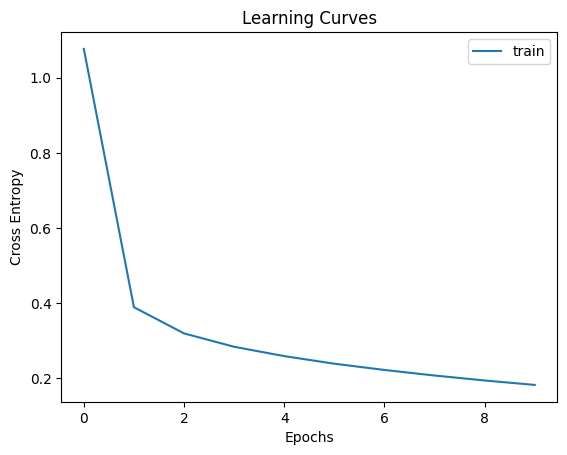

In [28]:
model = tf.keras.models.load_model('sgd.model')
loss, accuracy = model.evaluate(x_test,y_test)
print(history.history)
# ploting the learning curves
plt.title('Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy')
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()